# **TPS - July 2021**

![](https://www.navy.ac.kr:10001/intro/images/sang_01.jpg)

## [Click Here](https://www.kaggle.com/junhyeok99/pycaret-automl-baseline) to check pycaret baseline!

## **Library Import**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## **DATA LOAD**

In [29]:
train = pd.read_csv('../input/tabular-playground-series-jul-2021/train.csv')
train

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


In [30]:
test = pd.read_csv('../input/tabular-playground-series-jul-2021/test.csv')
test

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3
...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5


In [31]:
all_data = pd.concat([train, test])
all_data

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,NaN,NaN,NaN
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,NaN,NaN,NaN
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,NaN,NaN,NaN
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,NaN,NaN,NaN


## **Data Preprocessing**

*   There are only numeric columns
*   Maybe need to use linear regression!!



### **Datetime Preprocessing**

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 2246
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               9358 non-null   object 
 1   deg_C                   9358 non-null   float64
 2   relative_humidity       9358 non-null   float64
 3   absolute_humidity       9358 non-null   float64
 4   sensor_1                9358 non-null   float64
 5   sensor_2                9358 non-null   float64
 6   sensor_3                9358 non-null   float64
 7   sensor_4                9358 non-null   float64
 8   sensor_5                9358 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 950.4+ KB


In [33]:
all_data['date_time'] = pd.to_datetime(all_data['date_time'])
all_data['year'] = all_data['date_time'].dt.year
all_data['month'] = all_data['date_time'].dt.month
all_data['week'] = all_data['date_time'].dt.week
all_data['day'] = all_data['date_time'].dt.day
all_data['dayofweek'] = all_data['date_time'].dt.dayofweek
all_data['time'] = all_data['date_time'].dt.date - all_data['date_time'].dt.date.min()
all_data['hour'] = all_data['date_time'].dt.hour
all_data['time'] = all_data['time'].apply(lambda x : x.days)
all_data.drop(columns = 'date_time', inplace = True)
all_data

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,year,month,week,day,dayofweek,time,hour
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,2010,3,10,10,2,0,18
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,2010,3,10,10,2,0,19
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,2010,3,10,10,2,0,20
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,2010,3,10,10,2,0,21
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,2010,3,10,10,2,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,NaN,NaN,NaN,2011,4,14,4,0,390,10
2243,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,NaN,NaN,NaN,2011,4,14,4,0,390,11
2244,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,NaN,NaN,NaN,2011,4,14,4,0,390,12
2245,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,NaN,NaN,NaN,2011,4,14,4,0,390,13


## One-Hot Encoding - Day of Week column

### **This column seems categorical, not numeric**

In [34]:
all_data['dayofweek'] = all_data['dayofweek'].astype(object)
all_data = pd.get_dummies(all_data)

## **Feature Generation**

*  **SMC**

![SMC](https://t1.daumcdn.net/cfile/tistory/992B21365C99ADDC18)

*  **Dew Point**

![Dew Point Equation](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F999094495C930FC311)

In [35]:
# all_data['SMC'] = (all_data['absolute_humidity'] * 100) / all_data['relative_humidity']
# all_data['Dew_Point'] = 243.12*(np.log(all_data['relative_humidity'] * 0.01) + (17.62 * all_data['deg_C'])/(243.12+all_data['deg_C']))/(17.62-(np.log(all_data['relative_humidity'] * 0.01)+17.62*all_data['deg_C']/(243.12+all_data['deg_C'])))
# all_data['relative_humidity'] = all_data['relative_humidity']/100
# all_data['deg_F'] = all_data['deg_C'] * 1.8 + 32

In [36]:
train2 = all_data[:len(train)]
test2 = all_data[len(train):]
# train['SMC'] = train2['SMC']

### **Scaling**

#### **Log Scaling - Target values are skewed**

#### **Scaler**

In [37]:
def log_scaling(col):
  col = np.log1p(col)
  return col

In [38]:
cols = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']
for col in cols:
  train2[col] = log_scaling(train2[col])

#### **Compare with Visualization**

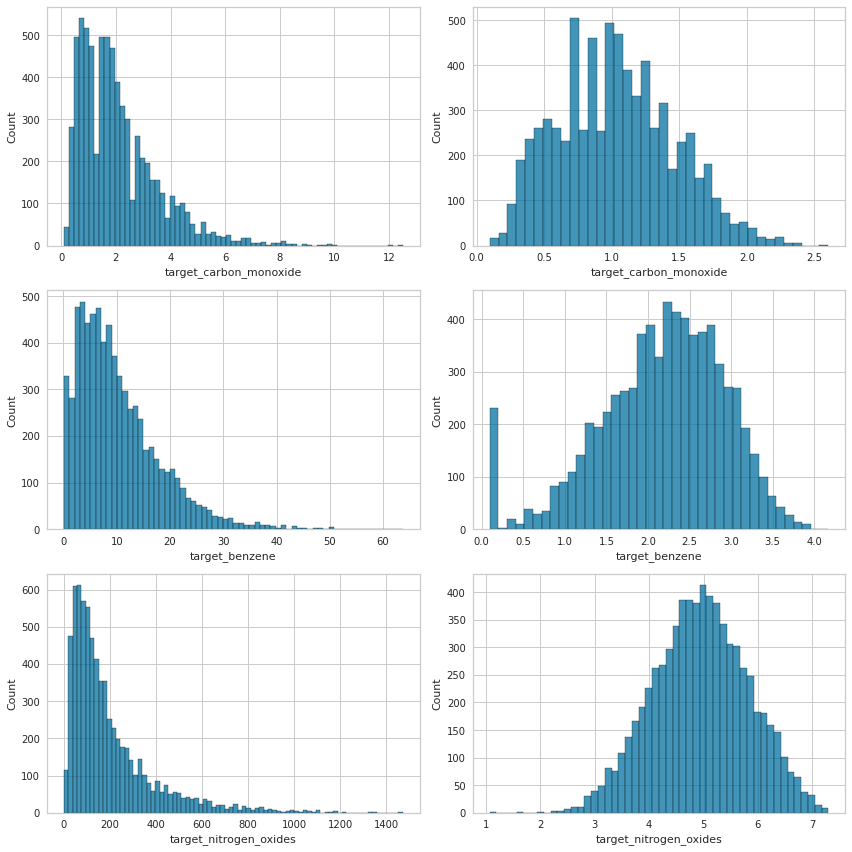

In [39]:
fig, ax = plt.subplots(len(cols), 2, figsize=(12,12))
n = 0
for i in cols:
  sns.histplot(train[i], ax=ax[n, 0]);
  sns.histplot(train2[i], ax = ax[n, 1]);
  n += 1

fig.tight_layout()
plt.show()

### **Split DataSets**

In [40]:
train_3 = train2.drop(columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])
test_3 = test2.drop(columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])

train_co = train2.drop(columns = ['target_benzene', 'target_nitrogen_oxides'])
train_be = train2.drop(columns = ['target_carbon_monoxide', 'target_nitrogen_oxides'])
train_no = train2.drop(columns = ['target_carbon_monoxide', 'target_benzene'])

test_co = test2.drop(columns = ['target_benzene', 'target_nitrogen_oxides'])
test_be = test2.drop(columns = ['target_carbon_monoxide', 'target_nitrogen_oxides'])
test_no = test2.drop(columns = ['target_carbon_monoxide', 'target_benzene'])

## **EDA**

### **Groupby Plot**

#### **Target & Time Relevance (Visualizaition)**

*   Year
*   Month
*   Time
*   Hour

##### **Three targets have similar tendency with above features**

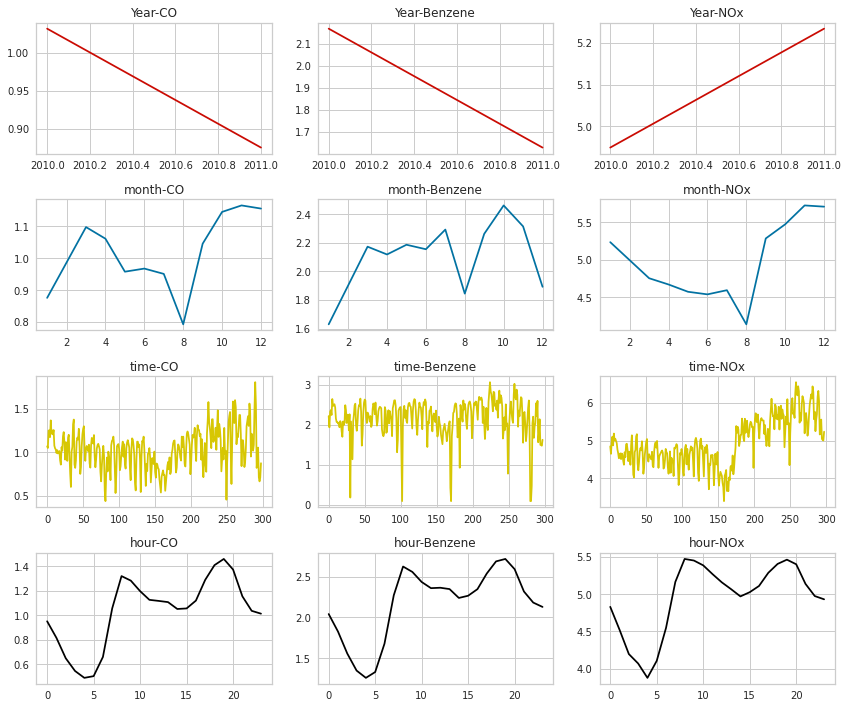

In [41]:
fig, ax = plt.subplots(4, 3, figsize = (12,10))

ax[0,0].plot(train2.groupby(train2['year'])['target_carbon_monoxide'].mean(), 'r');
ax[0,1].plot(train2.groupby(train2['year'])['target_benzene'].mean(), 'r');
ax[0,2].plot(train2.groupby(train2['year'])['target_nitrogen_oxides'].mean(), 'r');

ax[1,0].plot(train2.groupby(train2['month'])['target_carbon_monoxide'].mean(), 'b');
ax[1,1].plot(train2.groupby(train2['month'])['target_benzene'].mean(), 'b');
ax[1,2].plot(train2.groupby(train2['month'])['target_nitrogen_oxides'].mean(), 'b');

ax[2,0].plot(train2.groupby(train2['time'])['target_carbon_monoxide'].mean(), 'y');
ax[2,1].plot(train2.groupby(train2['time'])['target_benzene'].mean(), 'y');
ax[2,2].plot(train2.groupby(train2['time'])['target_nitrogen_oxides'].mean(), 'y');

ax[3,0].plot(train2.groupby(train2['hour'])['target_carbon_monoxide'].mean(), 'black');
ax[3,1].plot(train2.groupby(train2['hour'])['target_benzene'].mean(), 'black');
ax[3,2].plot(train2.groupby(train2['hour'])['target_nitrogen_oxides'].mean(), 'black');

ax[0,0].set_title('Year-CO')
ax[0,1].set_title('Year-Benzene')
ax[0,2].set_title('Year-NOx')

ax[1,0].set_title('month-CO')
ax[1,1].set_title('month-Benzene')
ax[1,2].set_title('month-NOx')

ax[2,0].set_title('time-CO')
ax[2,1].set_title('time-Benzene')
ax[2,2].set_title('time-NOx')

ax[3,0].set_title('hour-CO')
ax[3,1].set_title('hour-Benzene')
ax[3,2].set_title('hour-NOx')

fig.tight_layout()
plt.show()

#### **Target & Temp, Humid Relevance (Visualizaition)**

*   deg_C
*   Relative_Humidity
*   Absolute_Humidity

##### **Three targets have similar tendency with above features except NOx & Deg_c**

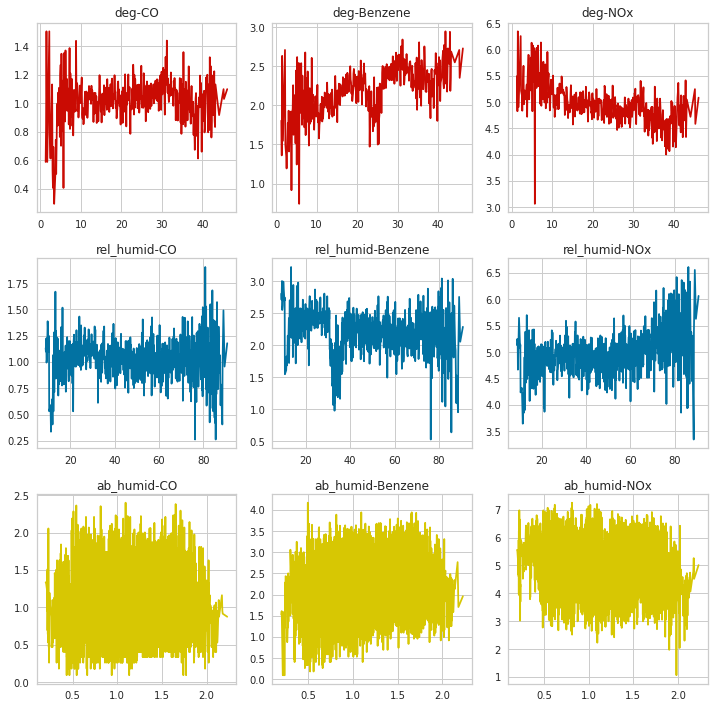

In [42]:
fig, ax = plt.subplots(3, 3, figsize = (10,10))

ax[0,0].plot(train2.groupby(train2['deg_C'])['target_carbon_monoxide'].mean(), 'r');
ax[0,1].plot(train2.groupby(train2['deg_C'])['target_benzene'].mean(), 'r');
ax[0,2].plot(train2.groupby(train2['deg_C'])['target_nitrogen_oxides'].mean(), 'r');

ax[1,0].plot(train2.groupby(train2['relative_humidity'])['target_carbon_monoxide'].mean(), 'b');
ax[1,1].plot(train2.groupby(train2['relative_humidity'])['target_benzene'].mean(), 'b');
ax[1,2].plot(train2.groupby(train2['relative_humidity'])['target_nitrogen_oxides'].mean(), 'b');

ax[2,0].plot(train2.groupby(train2['absolute_humidity'])['target_carbon_monoxide'].mean(), 'y');
ax[2,1].plot(train2.groupby(train2['absolute_humidity'])['target_benzene'].mean(), 'y');
ax[2,2].plot(train2.groupby(train2['absolute_humidity'])['target_nitrogen_oxides'].mean(), 'y');

ax[0,0].set_title('deg-CO')
ax[0,1].set_title('deg-Benzene')
ax[0,2].set_title('deg-NOx')

ax[1,0].set_title('rel_humid-CO')
ax[1,1].set_title('rel_humid-Benzene')
ax[1,2].set_title('rel_humid-NOx')

ax[2,0].set_title('ab_humid-CO')
ax[2,1].set_title('ab_humid-Benzene')
ax[2,2].set_title('ab_humid-NOx')


fig.tight_layout()
plt.show()

#### **Target & Sensors Relevance (Visualizaition)**

*   Sensor 1
*   Sensor 2
*   Sensor 3
*   Sensor 4
*   Sensor 5

##### **Three targets have similar tendency with above features**

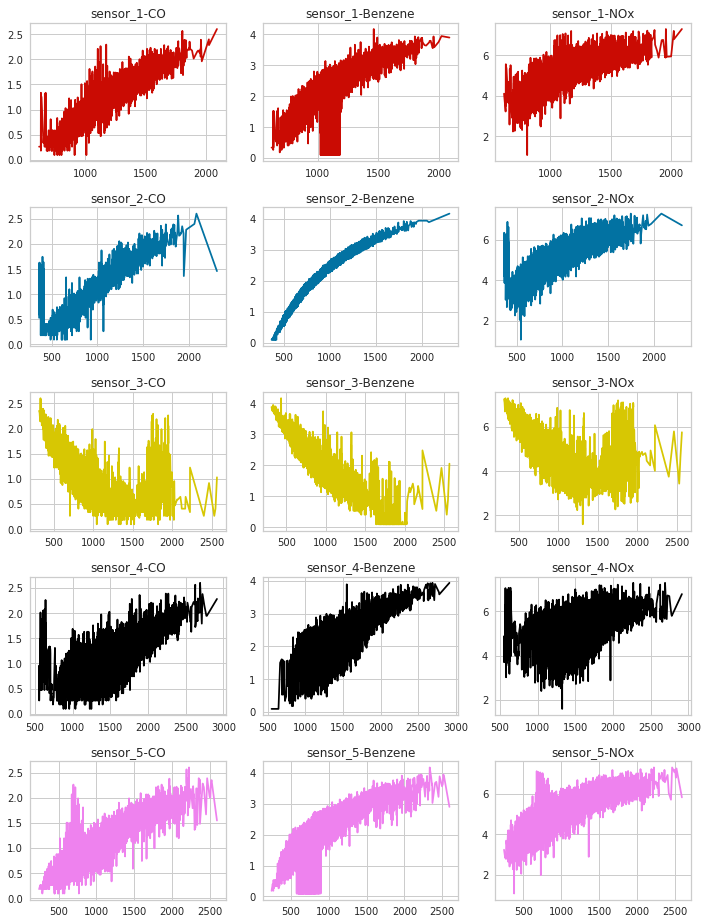

In [43]:
fig, ax = plt.subplots(5, 3, figsize = (10,13))

ax[0,0].plot(train2.groupby(train2['sensor_1'])['target_carbon_monoxide'].mean(), 'r');
ax[0,1].plot(train2.groupby(train2['sensor_1'])['target_benzene'].mean(), 'r');
ax[0,2].plot(train2.groupby(train2['sensor_1'])['target_nitrogen_oxides'].mean(), 'r');

ax[1,0].plot(train2.groupby(train2['sensor_2'])['target_carbon_monoxide'].mean(), 'b');
ax[1,1].plot(train2.groupby(train2['sensor_2'])['target_benzene'].mean(), 'b');
ax[1,2].plot(train2.groupby(train2['sensor_2'])['target_nitrogen_oxides'].mean(), 'b');

ax[2,0].plot(train2.groupby(train2['sensor_3'])['target_carbon_monoxide'].mean(), 'y');
ax[2,1].plot(train2.groupby(train2['sensor_3'])['target_benzene'].mean(), 'y');
ax[2,2].plot(train2.groupby(train2['sensor_3'])['target_nitrogen_oxides'].mean(), 'y');

ax[3,0].plot(train2.groupby(train2['sensor_4'])['target_carbon_monoxide'].mean(), 'black');
ax[3,1].plot(train2.groupby(train2['sensor_4'])['target_benzene'].mean(), 'black');
ax[3,2].plot(train2.groupby(train2['sensor_4'])['target_nitrogen_oxides'].mean(), 'black');

ax[4,0].plot(train2.groupby(train2['sensor_5'])['target_carbon_monoxide'].mean(), 'violet');
ax[4,1].plot(train2.groupby(train2['sensor_5'])['target_benzene'].mean(), 'violet');
ax[4,2].plot(train2.groupby(train2['sensor_5'])['target_nitrogen_oxides'].mean(), 'violet');

ax[0,0].set_title('sensor_1-CO')
ax[0,1].set_title('sensor_1-Benzene')
ax[0,2].set_title('sensor_1-NOx')

ax[1,0].set_title('sensor_2-CO')
ax[1,1].set_title('sensor_2-Benzene')
ax[1,2].set_title('sensor_2-NOx')

ax[2,0].set_title('sensor_3-CO')
ax[2,1].set_title('sensor_3-Benzene')
ax[2,2].set_title('sensor_3-NOx')

ax[3,0].set_title('sensor_4-CO')
ax[3,1].set_title('sensor_4-Benzene')
ax[3,2].set_title('sensor_4-NOx')

ax[4,0].set_title('sensor_5-CO')
ax[4,1].set_title('sensor_5-Benzene')
ax[4,2].set_title('sensor_5-NOx')

fig.tight_layout()
plt.show()

### **HeatMap**

*   **Heatmap shows us that sensor 1~5 are influential feature**
*   **But 'sensor_3' looks different from others**

#### **Need to check sensor_3 feature_importance later!!**

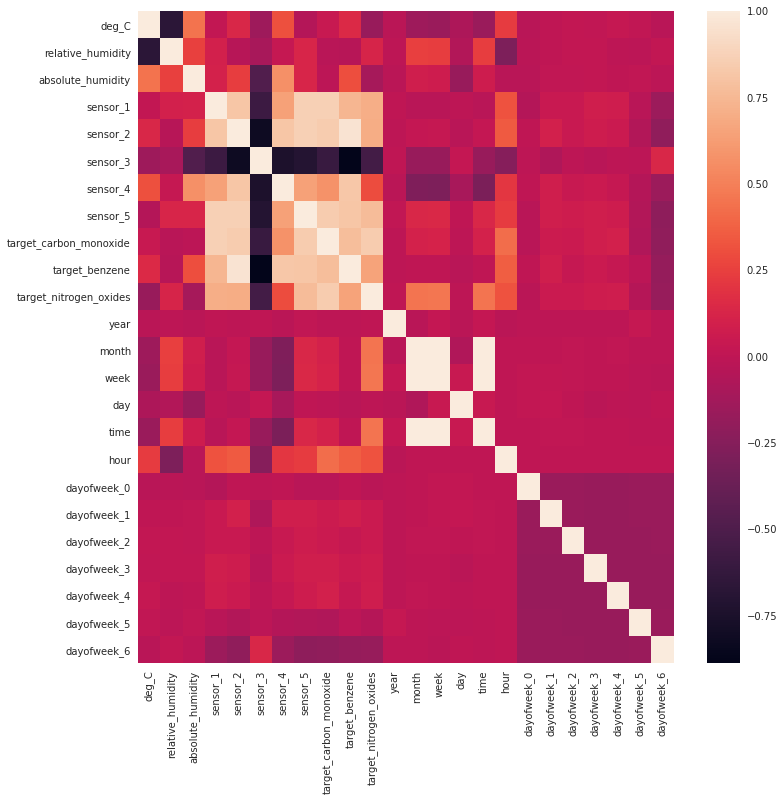

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(train2.corr());

### **BoxPlot**

#### **Shows that Month data, Hour data are influential because of the temp!**

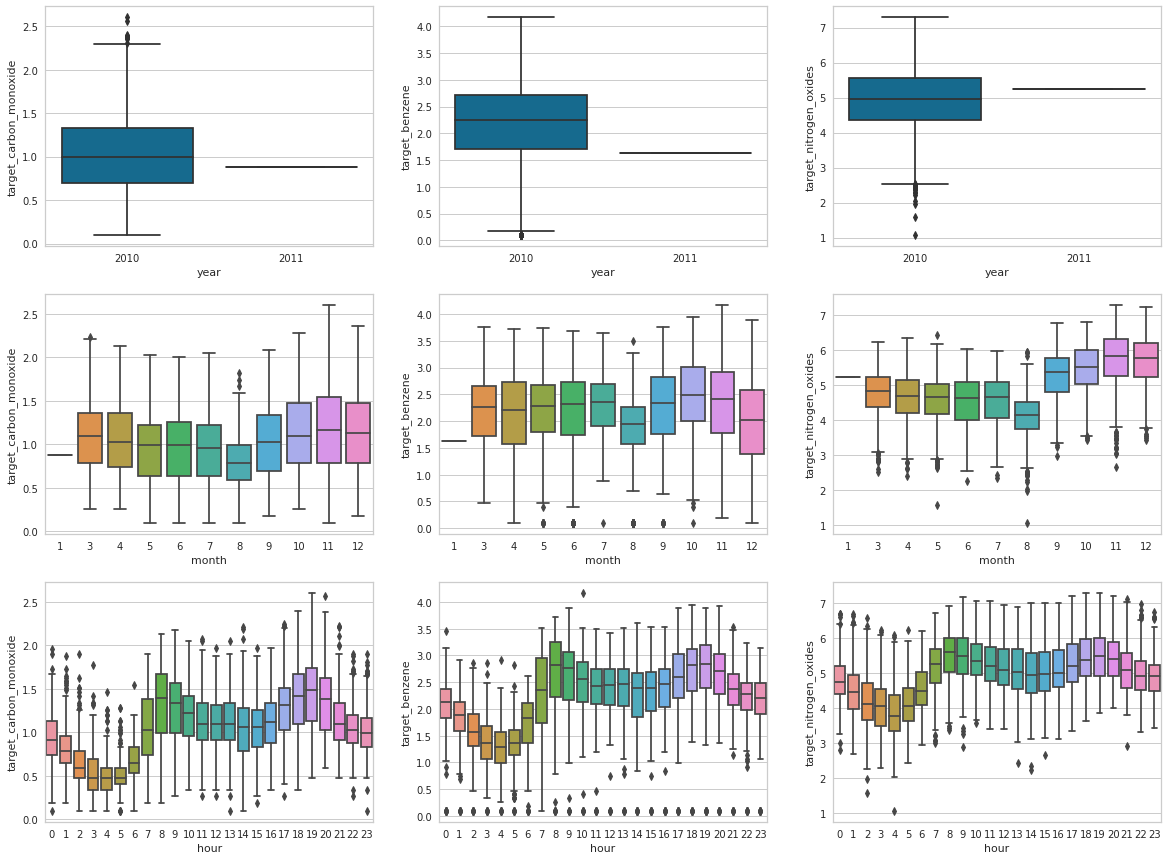

In [45]:
fig, ax = plt.subplots(3, 3, figsize = (20,15))
sns.boxplot(train2['year'], train2['target_carbon_monoxide'], ax = ax[0, 0]);
sns.boxplot(train2['year'], train2['target_benzene'], ax= ax[0, 1]);
sns.boxplot(train2['year'], train2['target_nitrogen_oxides'], ax = ax[0, 2]);

sns.boxplot(train2['month'], train2['target_carbon_monoxide'], ax = ax[1, 0]);
sns.boxplot(train2['month'], train2['target_benzene'], ax= ax[1, 1]);
sns.boxplot(train2['month'], train2['target_nitrogen_oxides'], ax = ax[1, 2]);

sns.boxplot(train2['hour'], train2['target_carbon_monoxide'], ax = ax[2,0]);
sns.boxplot(train2['hour'], train2['target_benzene'], ax= ax[2,1]);
sns.boxplot(train2['hour'], train2['target_nitrogen_oxides'], ax = ax[2,2]);

plt.show();

## **Modeling**

### **Pycaret**

In [46]:
# !pip install pycaret

In [47]:
from pycaret.regression import setup, compare_models, blend_models, finalize_model, predict_model, plot_model

#### **Model**

In [48]:
def pycaret_model(train, target, test, n_select, fold, opt):
  print('Setup Your Data....')
  setup(data=train,
              target=target,
              numeric_imputation = 'mean',
              silent= True)
  
  print('Comparing Models....')
  best = compare_models(sort=opt, n_select=n_select, fold = fold, exclude = ['xgboost'])

  print('Here is Best Model Feature Importances!')
  plot_model(estimator = best[0], plot = 'feature')
  time.sleep(5)
  
  print('Blending Models....')
  blended = blend_models(estimator_list= best, fold=fold, optimize=opt)
  pred_holdout = predict_model(blended)
    
  print('Finallizing Models....')
  final_model = finalize_model(blended)
  print('Done...!!!')

  pred_esb = predict_model(final_model, test)
  re = pred_esb['Label']

  return re

#### **Predict Result**

In [49]:
sub = pd.read_csv('../input/tabular-playground-series-jul-2021/sample_submission.csv')
sub['target_carbon_monoxide'] = np.exp(pycaret_model(train_co, 'target_carbon_monoxide', test_co, 5, 3, 'RMSLE'))-1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0749,0.0110,0.1049,0.9411,0.0550,0.1006
1,0.0750,0.0108,0.1041,0.9402,0.0517,0.0902
2,0.0760,0.0112,0.1059,0.9398,0.0549,0.0983
Mean,0.0753,0.0110,0.1050,0.9404,0.0539,0.0964
SD,0.0005,0.0002,0.0007,0.0006,0.0015,0.0045


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0703,0.0091,0.0954,0.9504,0.0480,0.0861


Finallizing Models....
Done...!!!


In [50]:
sub['target_benzene'] = np.exp(pycaret_model(train_be, 'target_benzene', test_be, 5, 3, 'RMSLE'))-1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0709,0.0078,0.0886,0.9861,0.0307,0.0395
1,0.0734,0.0083,0.0909,0.9862,0.0308,0.0395
2,0.0694,0.0074,0.0858,0.9870,0.0297,0.0395
Mean,0.0713,0.0078,0.0884,0.9864,0.0304,0.0395
SD,0.0017,0.0004,0.0021,0.0004,0.0005,0.0000


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0697,0.0073,0.0853,0.9876,0.0288,0.0372


Finallizing Models....
Done...!!!


In [51]:
sub['target_nitrogen_oxides'] = np.exp(pycaret_model(train_no, 'target_nitrogen_oxides', test_no, 4, 3, 'RMSLE')) - 1

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1476,0.0411,0.2027,0.9447,0.0374,0.0317
1,0.1556,0.0464,0.2154,0.9437,0.0417,0.0344
2,0.1491,0.0431,0.2077,0.9435,0.0390,0.0324
Mean,0.1508,0.0435,0.2086,0.9440,0.0393,0.0329
SD,0.0034,0.0022,0.0052,0.0005,0.0018,0.0011


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.1413,0.0353,0.1879,0.9546,0.0348,0.0306


Finallizing Models....
Done...!!!


In [52]:
sub

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.556638,4.566736,211.440327
1,2011-01-01 01:00:00,2.089865,7.480875,291.699163
2,2011-01-01 02:00:00,1.850170,7.454668,282.952654
3,2011-01-01 03:00:00,1.956306,8.275784,304.560467
4,2011-01-01 04:00:00,1.410511,6.357574,225.594198
...,...,...,...,...
2242,2011-04-04 10:00:00,2.908771,12.837047,216.621461
2243,2011-04-04 11:00:00,2.344740,10.558990,157.400371
2244,2011-04-04 12:00:00,2.508122,12.527667,155.711952
2245,2011-04-04 13:00:00,2.082979,10.684572,120.086832


In [55]:
sub.to_csv('sub.csv', index=False)